<h1 align="middle"> Formative Assessment Statistics</h1>

<hr style="border-color: black;">
<h1 align="left"><font color="blue">Basic Exploratory Data Analysis</font></h1>
<hr style="border-color: black;">

#### Importing all required modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 align="middle"> Data Collection</h1>

In [5]:
df = pd.read_csv("house_price.csv")
(df)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [8]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


### Shape Of the DataSet

In [8]:
df.shape

(13200, 7)

<span style = 'background:yellow'>There are 13200 rows adnf 7 columns in the dataset.</span>

#### Identify Numerical And Categorical Columns

In [9]:
numerical_columns = df.select_dtypes(include = 'number').columns
print(numerical_columns)

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')


In [10]:
categorical_columns = df.select_dtypes(include = 'object').columns
print(categorical_columns)

Index(['location', 'size'], dtype='object')


<span style = 'background:yellow'>Out of 7 columns, 2 Categorical and 5 numerical columns.</span>

### Checking for null values

In [11]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

<span style = 'background:yellow'>There is no any null values.</span>

### Checking for duplicate values

In [12]:
df.duplicated().sum()

1049

<span style = 'background:yellow'>There are 1049 duplicate values.</span>

### Understanding distribution of the data.

In [13]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Ploating Histograms for different numerical columns.

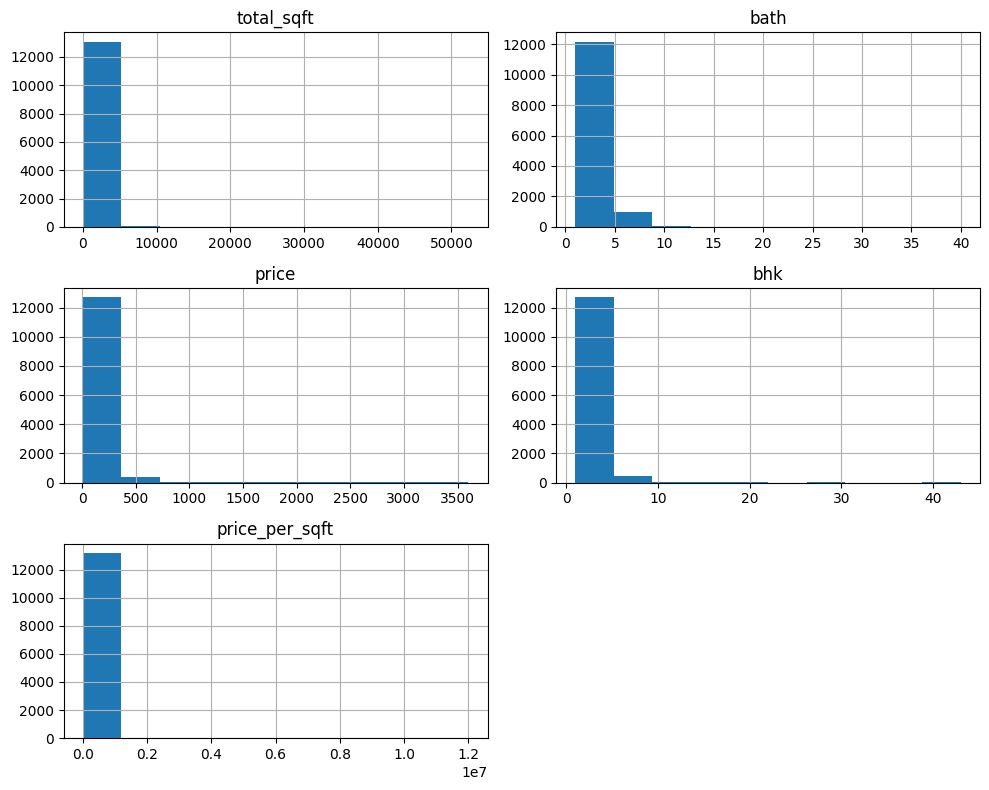

In [14]:
df[numerical_columns].hist(figsize = (10,8))
plt.tight_layout()
plt.show()

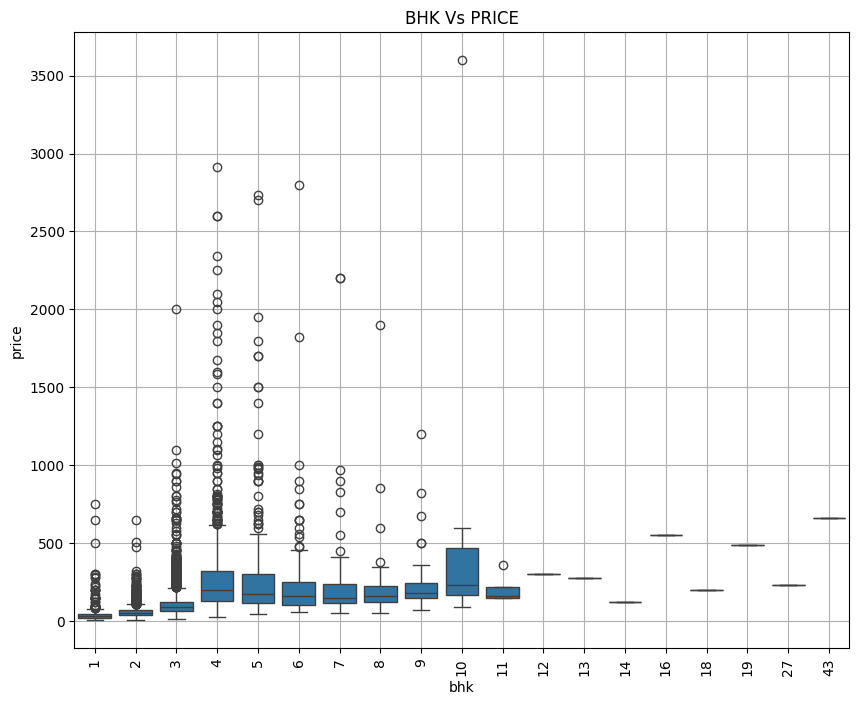

In [15]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'bhk', y = 'price', data = df)
plt.title('BHK Vs PRICE')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

<span style = 'background:yellow'>Analyzing the BHK Vs PRICE graph, outliers in the data are observed.</span>

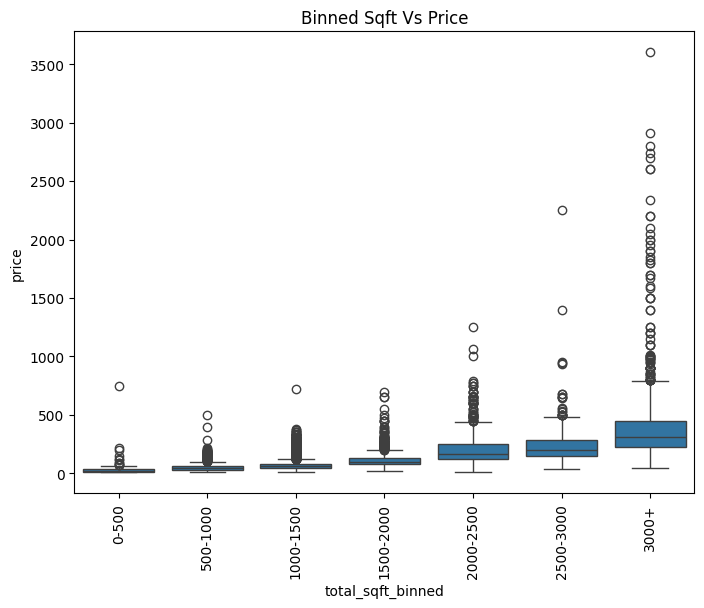

In [84]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']
df['total_sqft_binned'] = pd.cut(df['total_sqft'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 6))
sns.boxplot(x='total_sqft_binned', y='price', data=df)
plt.title('Binned Sqft Vs Price')
plt.xticks(rotation=90)
plt.show()

<span style = 'background:yellow'>Analyzing the Binned_Sqft Vs price graph, outliers in the data are observed.</span>

Text(0.5, 1.0, 'Boxplot - Price per SQFT')

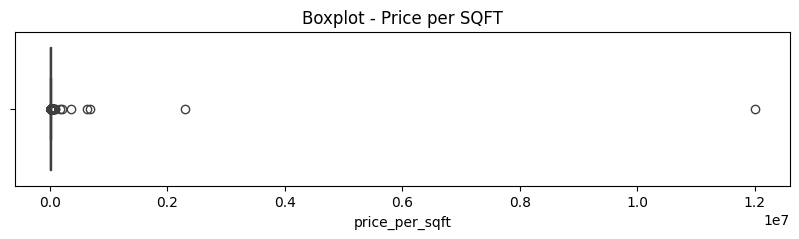

In [85]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'price_per_sqft', data = df)
plt.title('Boxplot - Price per SQFT')

<span style = 'background:yellow'>Analyzing the column "price_per_sqft", outliers in the data are observed.</span>

Text(0.5, 1.0, 'Histogram')

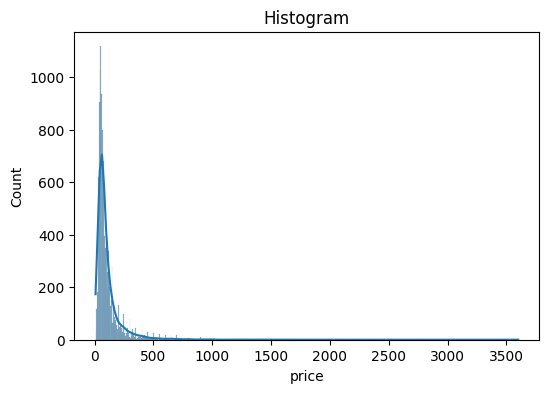

In [86]:
plt.figure(figsize=(6, 4))
sns.histplot(df["price"], kde = True)
plt.title('Histogram')

<span style = 'background:yellow'>Analyzing the histplot the data is rightly skewed, ie data have outliers values.</span>

Text(0.5, 1.0, 'Pairplot')

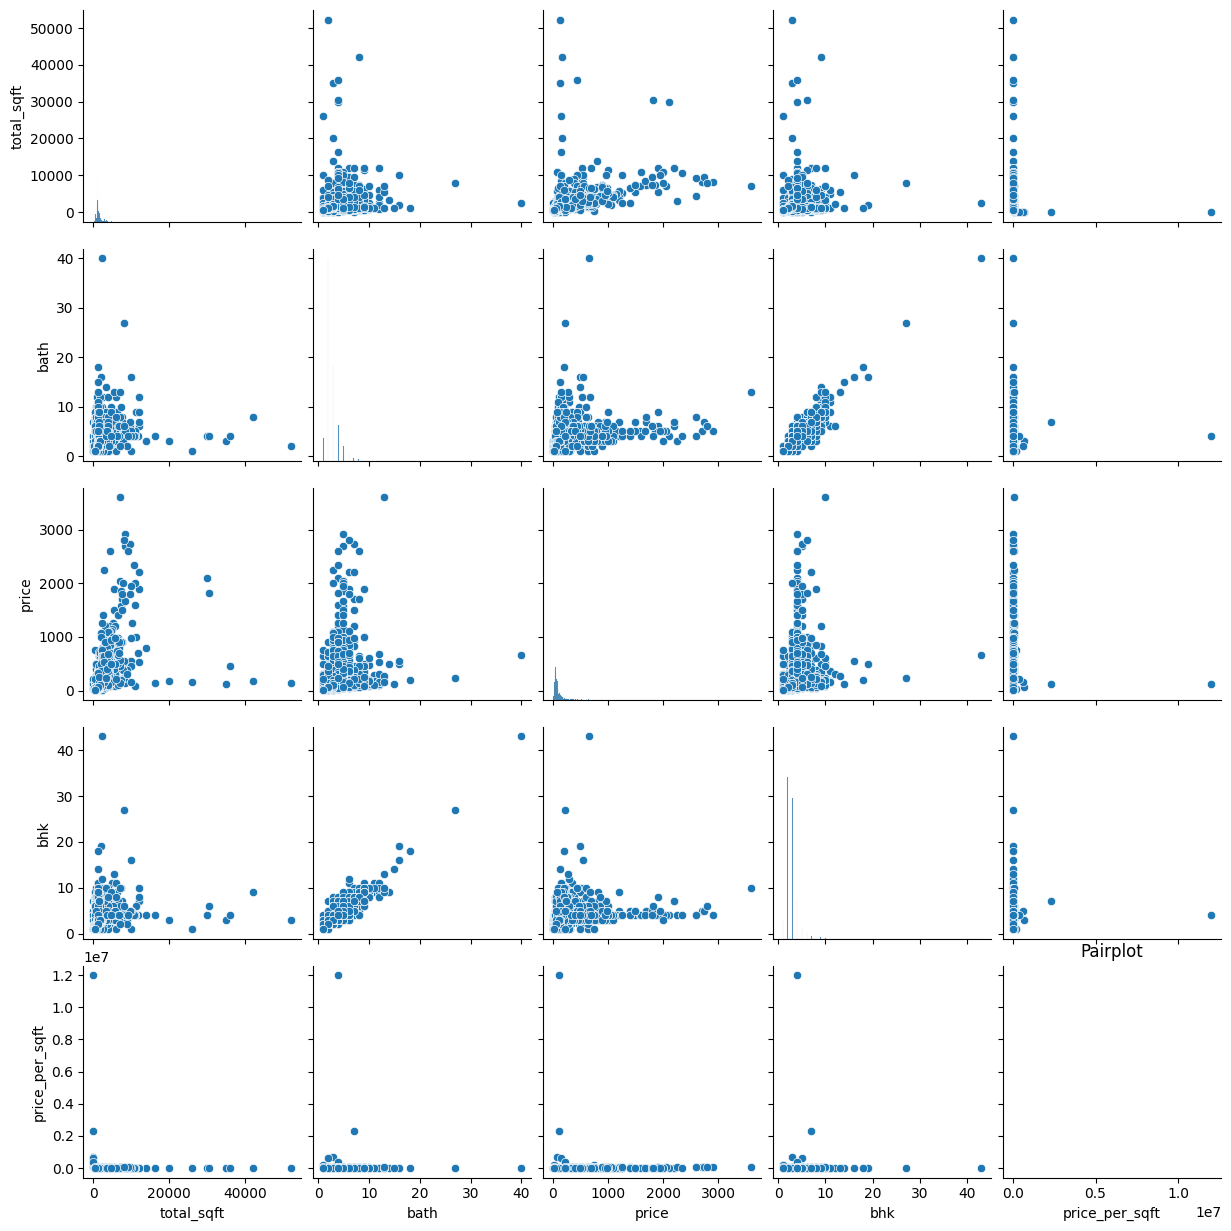

In [83]:
sns.pairplot(df)
plt.title('Pairplot')

# Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

## a) Mean and Standard deviation method

In [71]:
# To find the mean 
mean_price_sqft = df.price_per_sqft.mean()
print(mean_price_sqft)

7920.336742424242


In [72]:
# To find the Standard deviation
std_price_sqft = df.price_per_sqft.std()
print(std_price_sqft)

106727.16032810867


#### Finding outliers

In [73]:
df = pd.read_csv("house_price.csv")
upper_limit = (mean_price_sqft) + (3 * std_price_sqft)
lower_limit = (mean_price_sqft) - (3 * std_price_sqft)
print(f"Upper limit:, {upper_limit}")
print(f"Lower limit:, {lower_limit}")

Upper limit:, 328101.8177267502
Lower limit:, -312261.14424190175


In [74]:
outliers = df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]
print("Outliers:")
outliers

Outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


<span style = 'background:yellow'>Five outlier values are observed.</span>

#### Using Capping to cahnge the outliers

In [75]:
new_df = df.copy()
new_df['price_per_sqft'] = df['price_per_sqft'].astype(float)
new_df.loc[new_df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit
print("Modified DataFrame with capped outliers:")
new_df

Modified DataFrame with capped outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


Text(0.5, 1.0, 'Boxplot - Price per SQFT')

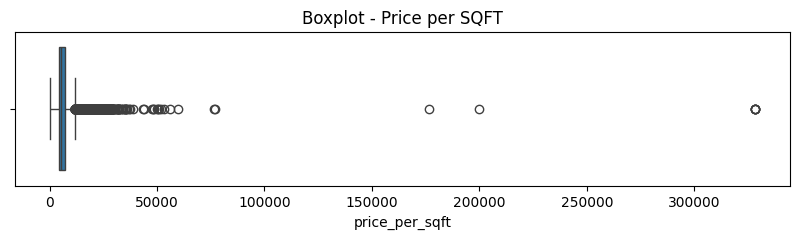

In [76]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'price_per_sqft', data = new_df)
plt.title('Boxplot - Price per SQFT')

Text(0.5, 1.0, 'Histogram')

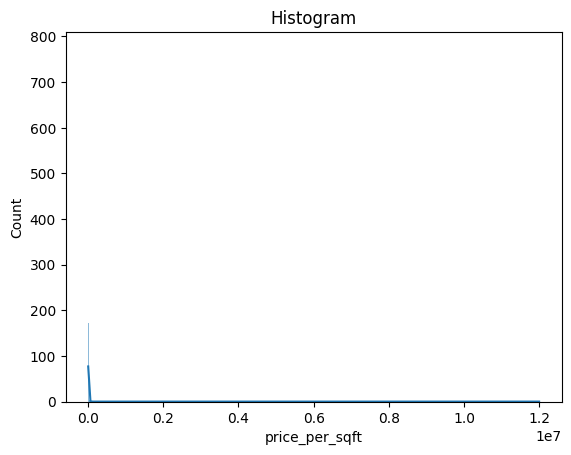

In [77]:
sns.histplot(data=new_df,x=df.price_per_sqft,kde=True)
plt.title('Histogram')

## b) Percentile method

In [78]:
upper_limit = df['price_per_sqft'].quantile(0.95)
lower_limit = df['price_per_sqft'].quantile(0.05)

print(f"Upper limit:, {upper_limit}")
print(f"Lower limit:, {lower_limit}")

Upper limit:, 15312.099999999984
Lower limit:, 3107.8500000000004


In [79]:
# Find outliers
outliers = df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]
print("Outliers:")
outliers

Outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


#### Using Capping to cahnge the outliers

In [80]:
new_df = df.copy()
new_df['price_per_sqft'] = df['price_per_sqft'].astype(float)
new_df.loc[new_df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit
print("Modified DataFrame with capped outliers:")
new_df

Modified DataFrame with capped outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.00
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.00
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.00
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.00
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.00
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.00


Text(0.5, 1.0, 'Boxplot - Price per SQFT')

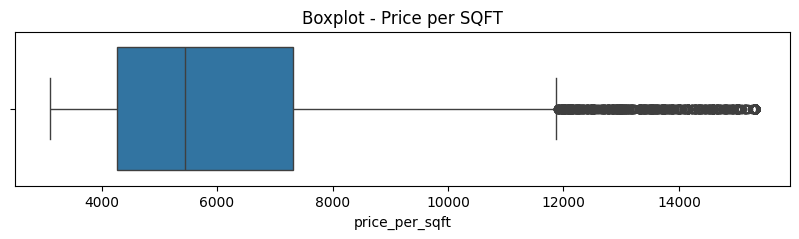

In [81]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'price_per_sqft', data = new_df)
plt.title('Boxplot - Price per SQFT')

Text(0.5, 1.0, 'Histogram')

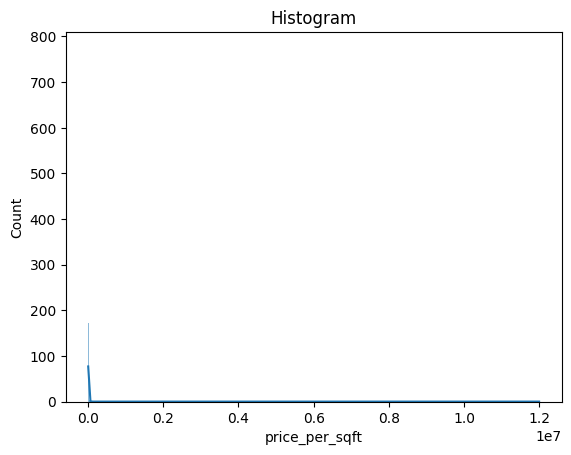

In [82]:
sns.histplot(data=new_df,x=df.price_per_sqft,kde=True)
plt.title('Histogram')

## c) IQR - Inter quartile range method.

In [64]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3 - q1

print(f'Q1:{q1}')
print(f'Q3:{q3}')
print(f'IQR:{iqr}')

Q1:4267.0
Q3:7317.0
IQR:3050.0


In [65]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q3 - (1.5 * iqr)
print(f"Upper limit:, {upper_limit}")
print(f"Lower limit:, {lower_limit}")

Upper limit:, 11892.0
Lower limit:, 2742.0


In [66]:
# Find outliers
outliers = df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]
print("Outliers:")
outliers

Outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


#### Using Capping to cahnge the outliers

In [68]:
new_df = df.copy()
new_df['price_per_sqft'] = df['price_per_sqft'].astype(float)
new_df.loc[new_df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit
print("Modified DataFrame with capped outliers:")
new_df

Modified DataFrame with capped outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


Text(0.5, 1.0, 'Boxplot - Price per SQFT')

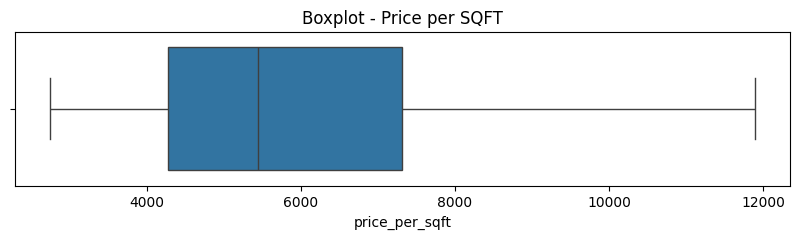

In [69]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'price_per_sqft', data = new_df)
plt.title('Boxplot - Price per SQFT')

Text(0.5, 1.0, 'Histogram')

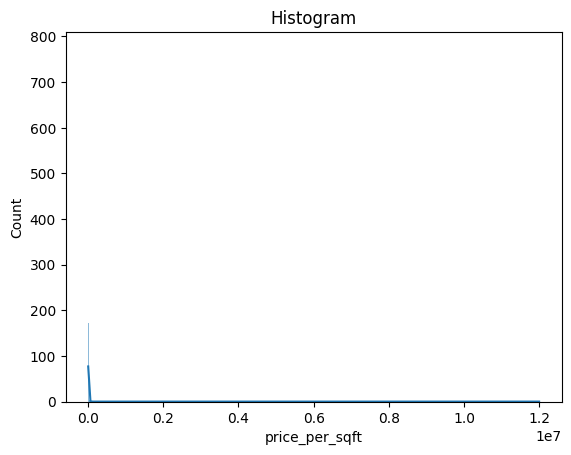

In [70]:
sns.histplot(data=new_df,x=df.price_per_sqft,kde=True)
plt.title('Histogram')

## d) Z - Score method

In [59]:
upper_limit = df['price_per_sqft'].mean() + 3*df['price_per_sqft'].std()
lower_limit = df['price_per_sqft'].mean() - 3*df['price_per_sqft'].std()
print(f"Upper limit:, {upper_limit}")
print(f"Lower limit:, {lower_limit}")

Upper limit:, 328101.8177267502
Lower limit:, -312261.14424190175


In [60]:
# Find outliers
outliers = df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]
print("Outliers:")
outliers

Outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [61]:
new_df = df.copy()
new_df['price_per_sqft'] = df['price_per_sqft'].astype(float)
new_df.loc[new_df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
new_df.loc[new_df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit
print("Modified DataFrame with capped outliers:")
new_df

Modified DataFrame with capped outliers:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


Text(0.5, 1.0, 'Boxplot - Price per SQFT')

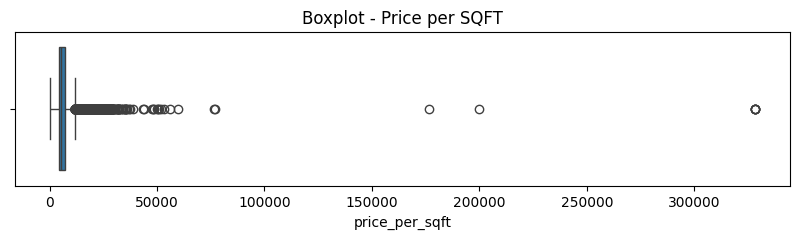

In [62]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'price_per_sqft', data = new_df)
plt.title('Boxplot - Price per SQFT')

Text(0.5, 1.0, 'Histogram')

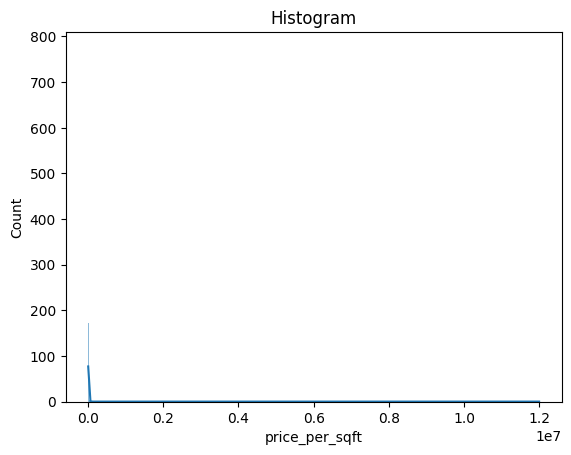

In [63]:
sns.histplot(data=new_df,x=df.price_per_sqft,kde=True)
plt.title('Histogram')

<span style = 'background:yellow'> Using boxplot analysis, we can conclude that the IQR method is the best way to remove outliers.</span>

### Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

<Axes: xlabel='price_per_sqft', ylabel='Count'>

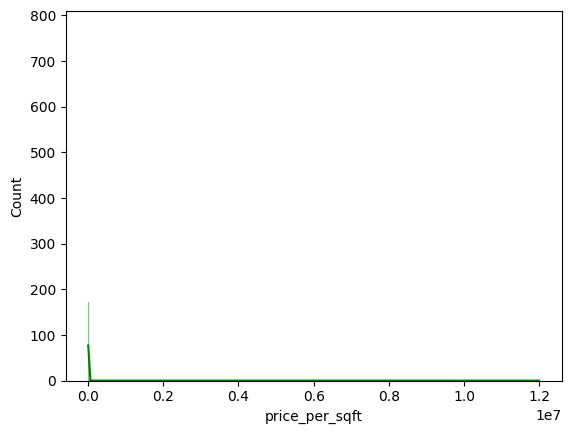

In [49]:
sns.histplot(data = df,x=df.price_per_sqft,kde=True,color='g')

## Checking the skewness and kurtosis

In [50]:
skewness = df['price_per_sqft'].skew()
kurtosis = df['price_per_sqft'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 108.28105529705168
Kurtosis: 12095.21502832288


## logarithmic transformation

In [57]:
new_df = df.copy()
new_df['log_price_per_sqft']=np.log(new_df['price_per_sqft']) # logarithmic transformation to tackle skewness
new_df['log_price_per_sqft']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: log_price_per_sqft, Length: 13200, dtype: float64

### Ploating Hist after log transformation.

Text(0.5, 1.0, 'Histogram')

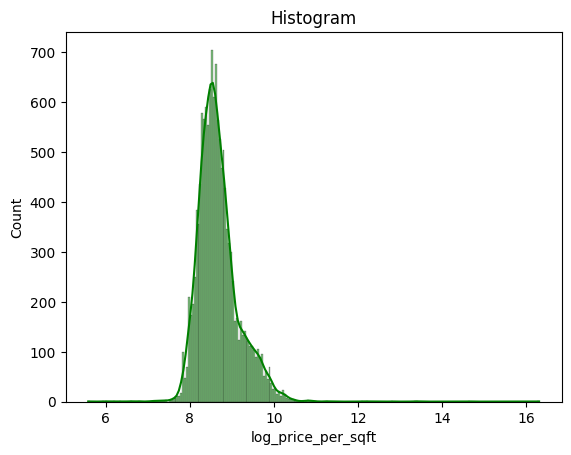

In [58]:
sns.histplot(data = new_df, x = new_df.log_price_per_sqft, kde=True, color='g')
plt.title('Histogram')

### Checking the skewness and kurtosis after log transformation.

In [53]:
skewness_t = new_df['log_price_per_sqft'].skew()
kurtosis_t = new_df['log_price_per_sqft'].kurt()

print(f"Skewness: {skewness_t}")
print(f"Kurtosis: {kurtosis_t}")

Skewness: 1.3998626551353
Kurtosis: 9.203576429862675


### Ploating Heatmap.

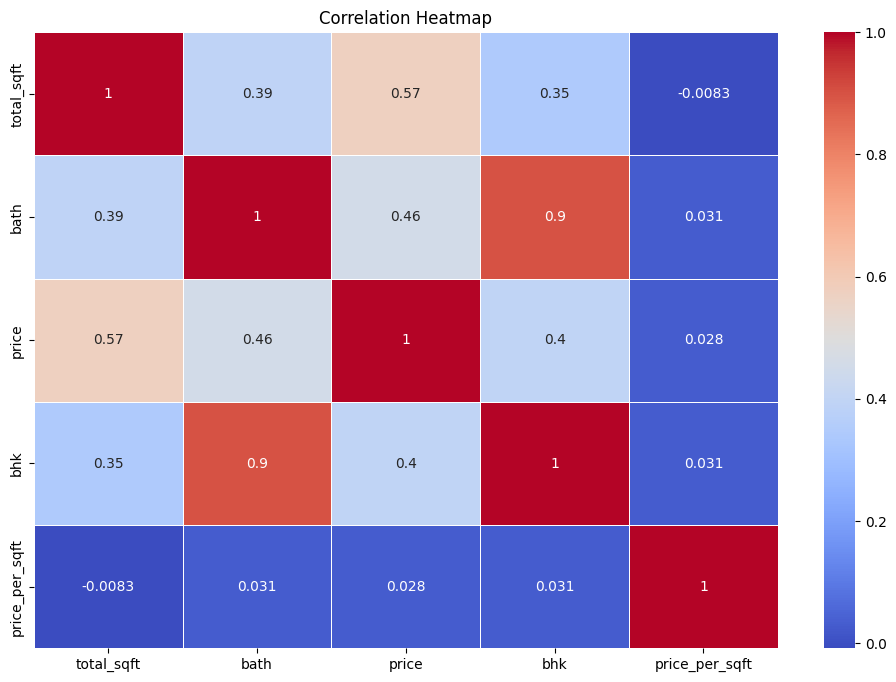

In [55]:
new_df = df.copy()
new_df['price_per_sqft'] = new_df['price_per_sqft'].astype(float)

numeric_df = new_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show(

### Ploating Scatter Plot.

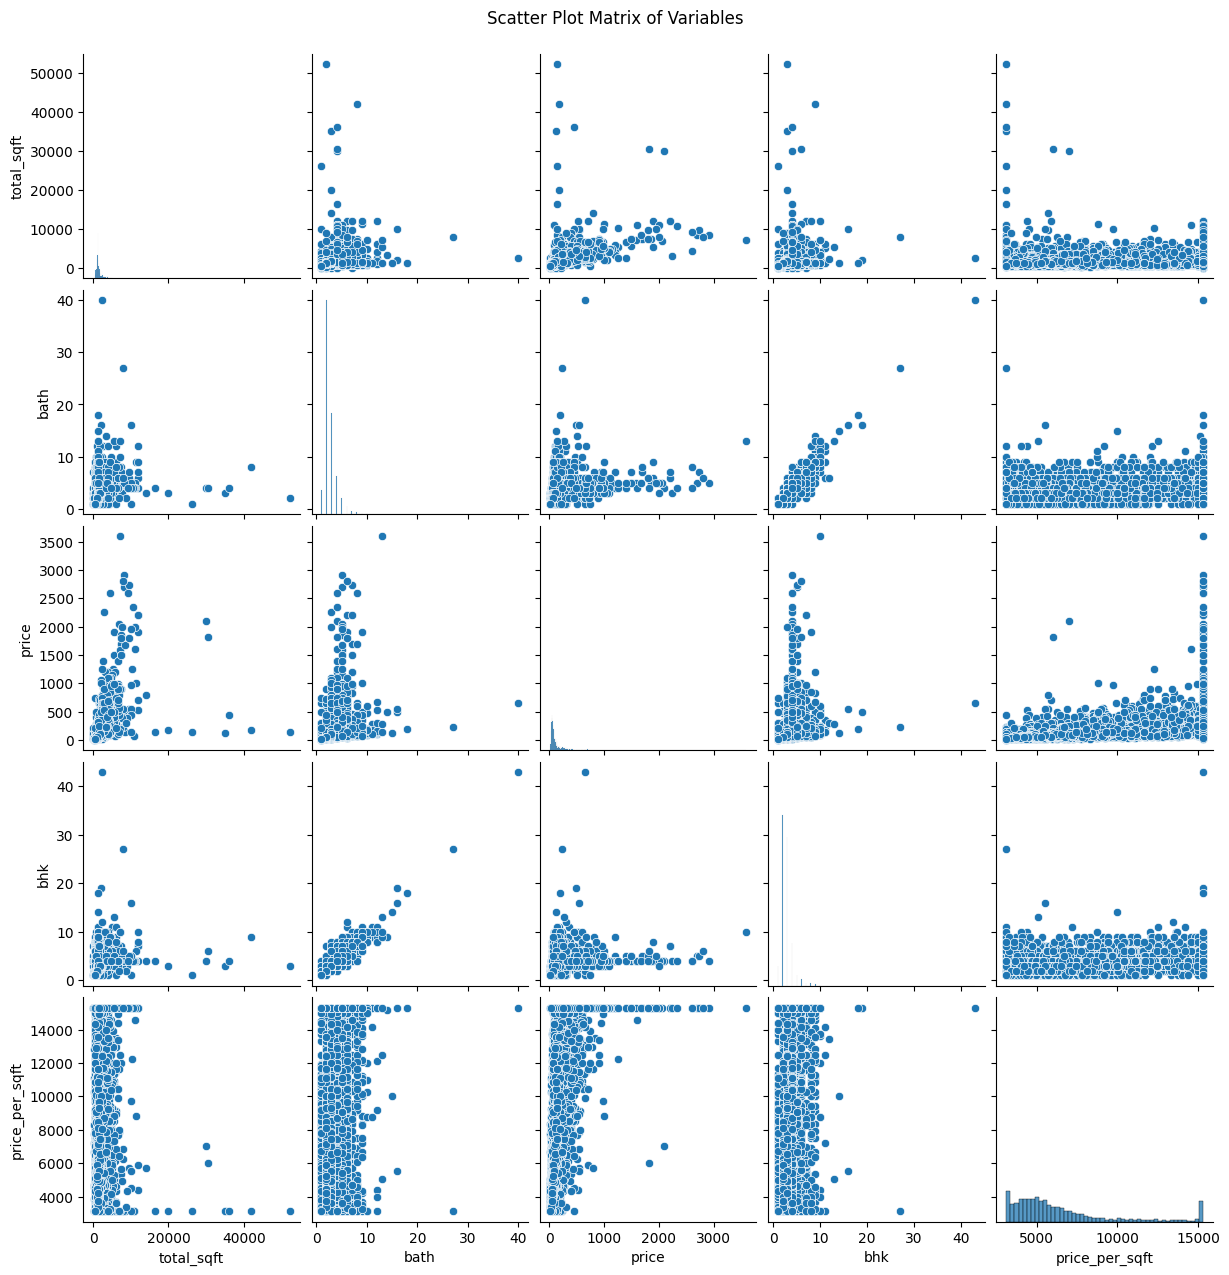

In [90]:
sns.pairplot(new_df)
plt.suptitle('Scatter Plot Matrix of Variables', y=1.02)
plt.show()

<h2 align="center"><font color="Red">END</font></h2